**(a)**

In [2]:
def data_creation(n, out = False):
  if out:
    x = np.random.uniform(0,1.5,size = n)
  else:
    x = np.random.uniform(0,1,size = n)
  y = np.sin(10 * np.pi * np.power(x, 4))
  return x,y

**(b)**

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [4]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(1, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Linear(256, 512),
        nn.ReLU(),
        nn.BatchNorm1d(512),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Linear(256, 1),
    )

  def forward(self, x):
    out = self.layers(x)
    return out

In [5]:
def train(n, batch_size, lr=1e-4, weight_decay=1e-5, epochs=600):
  train_loss = []
  net = Model()
  criterion = nn.MSELoss()
  optimizer = optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)
  x_train, y_train = data_creation(n)
  x_train = torch.from_numpy(x_train).float().view(-1, 1)
  y_train = torch.from_numpy(y_train).float().view(-1, 1)
  losses = []
  for epoch in range(epochs):
    indexes = torch.randperm(x_train.shape[0])
    x_train = x_train[indexes]
    y_train = y_train[indexes]
    for i in range(0, n, batch_size):
      optimizer.zero_grad()
      x_batch = x_train[i:i+batch_size]
      y_batch = y_train[i:i+batch_size]
      outputs = net(x_batch)
      loss = criterion(outputs, y_batch)
      losses.append(loss.item())
      loss.backward()
      optimizer.step()
    train_loss.append(np.mean(losses))
  print("model loss with n =",n,":", train_loss[-1])

  return net, train_loss

In [6]:
def calculate_discrepancy(model, n):
  x_input_in, y_input_in = data_creation(n)
  x_input_out, y_input_out = data_creation(n, True)

  model.eval()
  with torch.no_grad():
    predicted_in = model(torch.from_numpy(x_input_in).float().view(-1, 1))
    predicted_out = model(torch.from_numpy(x_input_out).float().view(-1, 1))

  disc_in = torch.max(torch.abs(predicted_in - y_input_in)).item()
  disc_out = torch.max(torch.abs(predicted_out - y_input_out)).item()

  return disc_in, disc_out

model loss with n = 1000 : 0.008087085321720224


Text(0, 0.5, 'training loss')

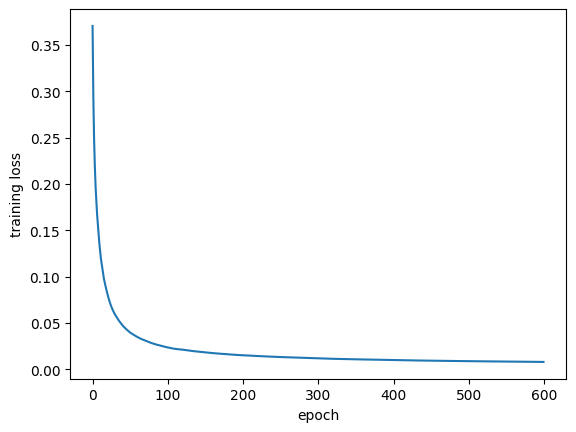

In [7]:
from matplotlib import pyplot as plt
model,train_loss = train(1000, 200)
plt.plot(train_loss)
plt.xlabel("epoch")
plt.ylabel("training loss")

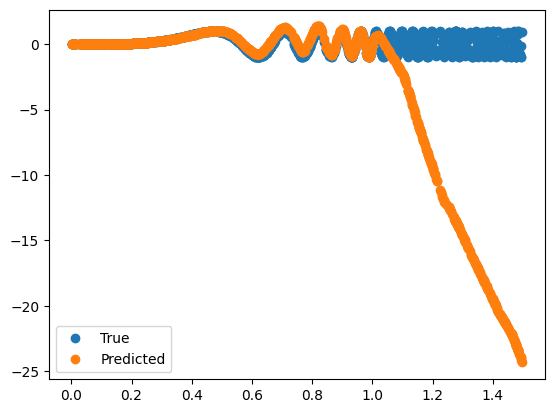

In [12]:
x_input_in, y_input_in = data_creation(1000,True)
model.eval()
with torch.no_grad():
  predicted_in = model(torch.from_numpy(x_input_in).float().view(-1, 1))
plt.plot(x_input_in,y_input_in,marker='o',linestyle='None')
plt.plot(x_input_in,predicted_in,marker='o',linestyle='None')
plt.legend(("True","Predicted"))

**(c)**

In [ ]:
ns = np.logspace(1, 3, 20).astype(int)
ns[ns % 5 == 1] += 1
mean_in = []
std_in = []
mean_out = []
std_out = []
for n in ns:
  f_in = []
  f_out = []
  for i in range(5):
    model,train_loss = train(n, n//5)
    disc_in, disc_out = calculate_discrepancy(model, n)
    f_in.append(disc_in)
    f_out.append(disc_out)
  mean_in.append(np.mean(f_in))
  mean_out.append(np.mean(f_out))
  std_in.append(np.std(f_in))
  std_out.append(np.std(f_out))


model loss with n = 10 : 0.3787090281341904
model loss with n = 10 : 0.31736802191581226
model loss with n = 10 : 0.14496183684355735
model loss with n = 10 : 0.18644822744611883
model loss with n = 10 : 0.21391266980303528
model loss with n = 12 : 0.3382840807693154
model loss with n = 12 : 0.17849381671806946
model loss with n = 12 : 0.25592745374683645
model loss with n = 12 : 0.1738056250680913
model loss with n = 12 : 0.47211274516738033
model loss with n = 17 : 0.25311886697993435
model loss with n = 17 : 0.22600212202615189
model loss with n = 17 : 0.20994074311750915
model loss with n = 17 : 0.20543105983113896
model loss with n = 17 : 0.14060378447303568
model loss with n = 20 : 0.1395133027775058
model loss with n = 20 : 0.16057922203346
model loss with n = 20 : 0.1914037257419744
model loss with n = 20 : 0.16715373973486325
model loss with n = 20 : 0.16275681926973629
model loss with n = 27 : 0.05219548593491102
model loss with n = 27 : 0.2153411510692644
model loss with n =

Text(0, 0.5, 'Log Discrepancy')

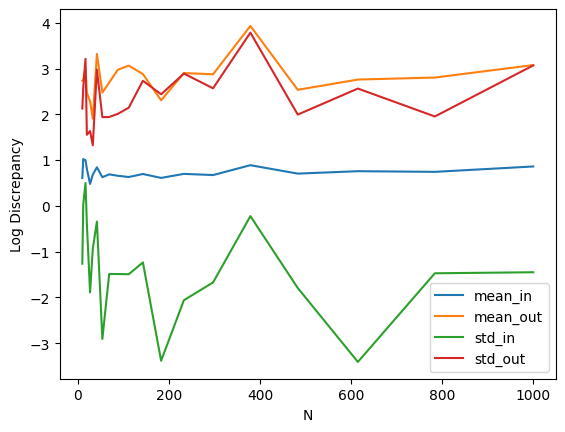

In [ ]:
plt.plot(ns,np.log(mean_in))
plt.plot(ns,np.log(mean_out))
plt.plot(ns,np.log(std_in))
plt.plot(ns,np.log(std_out))
plt.legend(("mean_in","mean_out","std_in","std_out"))
plt.xlabel("N")
plt.ylabel("Log Discrepancy")